<a href="https://colab.research.google.com/github/Bosy-Ayman/DSAI-456-Speech/blob/main/Assignment3_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import os


In [116]:
MALE_FILE = 'Male.wav'
FEMALE_FILE = 'Female.wav'
N_MELS = 256
N_FFT = 2048
HOP_LENGTH = 512
F0_THRESHOLD = 165.0


In [117]:
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)

    if 'ipykernel' in str(type(get_ipython())):
            print(f"\n--- Playing: {file_path} (Sample Rate: {sr} Hz) ---")
            display(Audio(data=y, rate=sr))


    return y, sr

In [118]:
def load_and_play_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)

    print(f"\n--- Playing: {file_path} (Sample Rate: {sr} Hz) ---")

    display(Audio(data=y, rate=sr))

    S_mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=N_FFT,
        hop_length=HOP_LENGTH,
        n_mels=N_MELS
    )
    S_dB = librosa.power_to_db(S_mel, ref=np.max)

    return y, sr, S_dB

In [119]:
def calculate_f0_median(y, sr, hop_length):
    f0, voiced_flag, _ = librosa.pyin(
        y,
        fmin=librosa.note_to_hz('C2'),  # 65 Hz (low end for male)
        fmax=librosa.note_to_hz('C6'),  # 1046 Hz (high end for female/singing)
        sr=sr,
        frame_length=N_FFT,
        hop_length=hop_length
    )

    # Filter out unvoiced frames
    f0_voiced = f0[voiced_flag]

    # Calculate the median F0
    if len(f0_voiced) > 0:
        median_f0 = np.median(f0_voiced)
    else:
        median_f0 = 0.0

    return median_f0



In [120]:

def classify_gender(F0_median_value):

    print("\n--- F0 Gender Classification ---")
    print(f"Calculated Median F0: {F0_median_value:.2f} Hz")
    print(f"Classification Threshold: {F0_THRESHOLD:.2f} Hz")

    if F0_median_value < F0_THRESHOLD:
        print(f"Result: F0 is below the threshold, classified as MALE .")
    else:
        print(f"Result: F0 is above the threshold, classified as FEMALE .")

  # Male Spectrogram

In [121]:
y_male, sr_male, S_dB_male = load_and_play_audio(MALE_FILE)



--- Playing: Male.wav (Sample Rate: 24000 Hz) ---


In [122]:
F0_median_male = calculate_f0_median(y_male, sr_male, HOP_LENGTH)

classify_gender(F0_median_male)




--- F0 Gender Classification ---
Calculated Median F0: 117.22 Hz
Classification Threshold: 165.00 Hz
Result: F0 is below the threshold, classified as MALE .


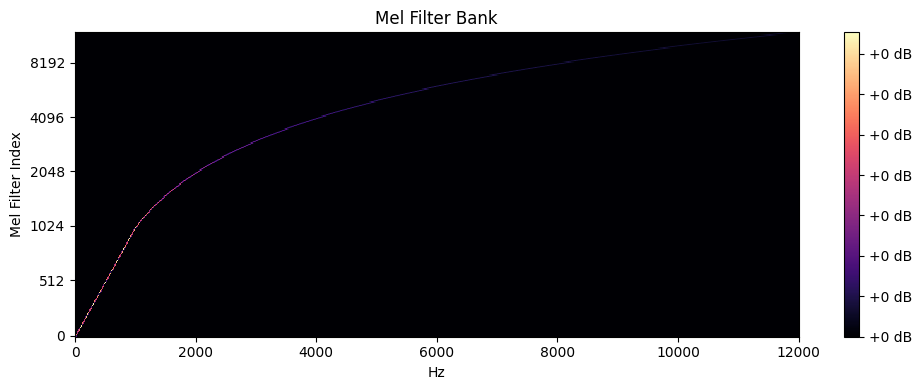

In [131]:
mel_basis = librosa.filters.mel(
        sr=sr_male,
        n_fft=N_FFT,
        n_mels=N_MELS
    )

plt.figure(figsize=(10, 4))
librosa.display.specshow(
        mel_basis,
        x_axis='linear',
        y_axis='mel',
        sr=sr_male,
        fmax=sr_male/2
    )
plt.ylabel('Mel Filter Index')
plt.title(f'Mel Filter Bank')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


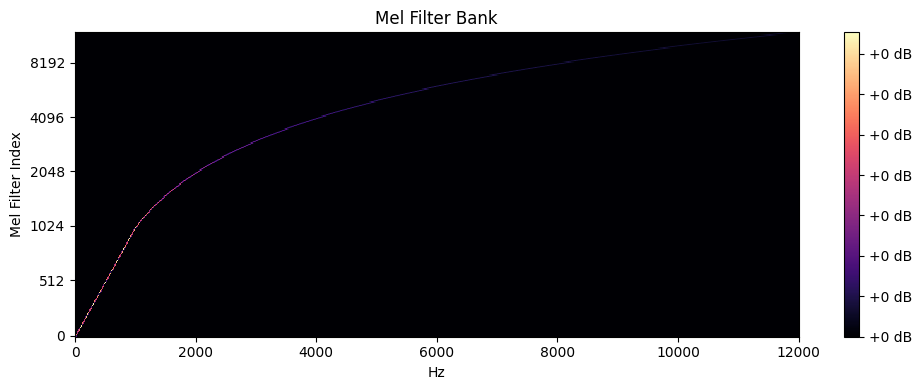

In [124]:
mel_basis = librosa.filters.mel(
        sr=sr_female,
        n_fft=N_FFT,
        n_mels=N_MELS
    )

plt.figure(figsize=(10, 4))
librosa.display.specshow(
        mel_basis,
        x_axis='linear',
        y_axis='mel',
        sr=sr_male,
        fmax=sr_male/2
    )
plt.ylabel('Mel Filter Index')
plt.title(f'Mel Filter Bank')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


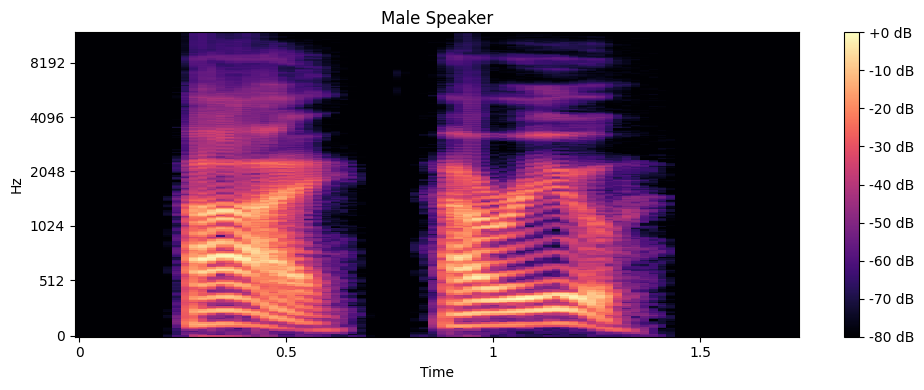

In [125]:
fig_male, ax_male = plt.subplots(figsize=(10, 4))

img_male = librosa.display.specshow(
    S_dB_male,
    sr=sr_male,
    x_axis='time',
    y_axis='mel',
    ax=ax_male,
    hop_length=HOP_LENGTH
)

ax_male.set(title='Male Speaker')
fig_male.colorbar(img_male, format='%+2.0f dB')
plt.tight_layout()
plt.show()


  # Female Spectrogram


In [126]:
y_female, sr_female, S_dB_female = load_and_play_audio(FEMALE_FILE)
F0_median_female = calculate_f0_median(y_female, sr_female, HOP_LENGTH)



--- Playing: Female.wav (Sample Rate: 24000 Hz) ---


## Classify Female speaker


In [127]:

print("\n--- Female Speaker Analysis ---")
classify_gender(F0_median_female)


--- Female Speaker Analysis ---

--- F0 Gender Classification ---
Calculated Median F0: 257.13 Hz
Classification Threshold: 165.00 Hz
Result: F0 is above the threshold, classified as FEMALE .


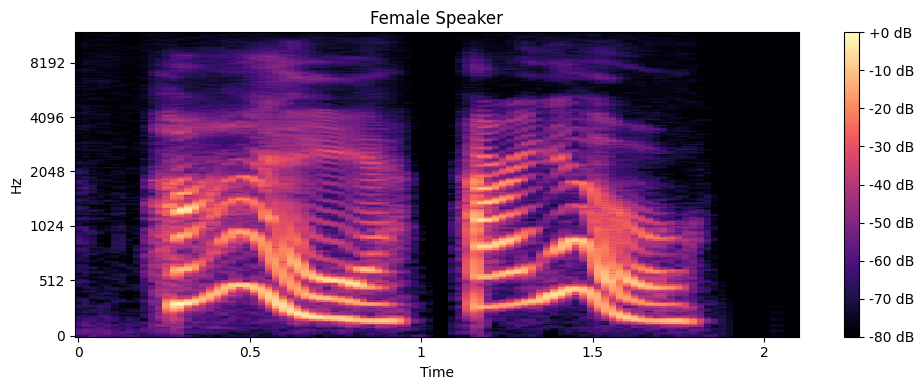

In [128]:
fig_female, ax_female = plt.subplots(figsize=(10, 4))

img_female = librosa.display.specshow(
    S_dB_female,
    sr= sr_female,
    x_axis='time',
    y_axis='mel',
    ax=ax_female,
    hop_length=HOP_LENGTH
)

ax_female.set(title='Female Speaker')
fig_female.colorbar(img_female, format='%+2.0f dB')

plt.tight_layout()
plt.show()




---



| **Aspect**                  | **Male Voice**                                                                                                     | **Female Voice**                                                             |
| --------------------------- | ------------------------------------------------------------------------------------------------------------------ | ---------------------------------------------------------------------------- |
| **Typical Mean F0 (Pitch)** | ~85 Hz – 180 Hz                                                                                                    | ~165 Hz – 255 Hz                                                             |
| **Mel (Pitch perception)**  | Lower Mel values → deeper, lower pitch                                                                             | Higher Mel values → higher, brighter pitch                                   |
| **Intensity (Loudness)**    | Can be **equal**, **higher**, or **lower** depending on how the person speaks — intensity doesn’t depend on gender | Same — intensity is about how **loud** someone speaks, not their pitch       |
| **Spectrogram appearance**  | Energy (dark areas) concentrated at **lower frequencies** (bottom part of spectrogram)                             | Energy more spread toward **higher frequencies** (upper part of spectrogram) |
| **Human perception**        | Sounds “deeper” or “bass-like”                                                                                     | Sounds “sharper” or “brighter”                                               |
| **Summary**                 | Lower Mel + similar or slightly lower intensity                                                                    | Higher Mel + similar or slightly higher intensity                            |


In [129]:
sr_female , sr_male

(24000, 24000)